In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import OrthogonalPolynomials
# Reloading the module
import importlib
importlib.reload(OrthogonalPolynomials)
from OrthogonalPolynomials import *

## Chebyshev collocation method for 1D diffusion equation

In [17]:
# Node range: 0,1,...,N
N = 20
# Chebyshev Gauss Lobatto nodes
x = ChebyshevGaussLobattoNodes(N)
# Differentiation matrix
D = ChebyshevDiffMatrix(x)
# Barycentric weights
w_bary = BarycentricWeights(x)
# Differentiation matrix for the 2nd-order derivative
D2 = PolynomialDiffMatrix_HighOrder(2, x, w_bary, D)

In [18]:
# IC
def InitCond_1D_Diffusion(x):
    # Calculating the initial value at x
    return 1-x**2

u0 = np.zeros(N+1)
# The initial condition function may not be vectorized
# So we use a for loop to calculate the initial nodal values separately
for j in range(N+1):
    u0[j] = InitCond_1D_Diffusion(x[j])
    
# BC:
u_left = 0
u_right = 0

In [19]:
# Evaluate the RHS of the ODE system
def RHS_1D_Diffusion_DiffMat(t, u, D2, N, u_left, u_right):
    # Evaluate the RHS of the ODE system for the 1D diffusion equation
    # Calculated with the 2nd-order differentiation matrix
    # Note that u_0 and u_N are fixed
    # We only need to solve u1,...,u_{N-1}
    # u: u1 ... u_{N-1}
    # D2: 2nd-order differentiation matrix
    # N: the largest node index
    # u_left: left bondary value
    # u_right: right boundary value
    
    # Adding the boundary values
    # Note that the Chebyshev points range from 1 to -1
    u_all = np.concatenate(( np.array([u_right]), u, np.array([u_left]) ))
    RHS = np.dot(D2, u_all)
    # Only return the right-hand sides for u1 ... u_{N-1}
    return RHS[1:-1]

Text(0.5, 1.0, '$u_t=u_{xx}$')

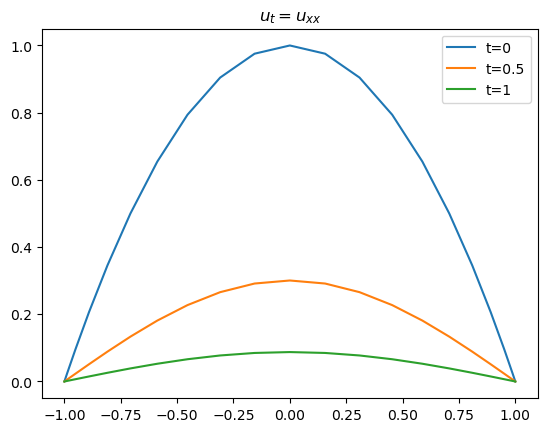

In [20]:
# Scipy calculation
t_span = [0, 1]
t_eval=[0,0.5,1]
sol = solve_ivp(RHS_1D_Diffusion_DiffMat, 
                t_span=t_span, 
                y0=u0[1:-1], 
                method='RK45', 
                t_eval=t_eval, 
                args=(D2, N, u_left, u_right))

fig = plt.figure()
ax = fig.add_subplot(111)

Nt = len(t_eval)
for it in range(Nt):
    u = np.concatenate(( np.array([u_left]), sol.y[:,it], np.array([u_right]) ))
    ax.plot(x, u, label='t={}'.format(t_eval[it]))


ax.legend()
ax.set_title(r'$u_t=u_{xx}$')

## Testing the reversed chebyshev points

In [21]:
# Node range: 0,1,...,N
N = 20
# Chebyshev Gauss Lobatto nodes
x = ChebyshevGaussLobattoNodes_Reversed(N)
# Differentiation matrix
D = ChebyshevDiffMatrix(x)
# Barycentric weights
w_bary = BarycentricWeights(x)
# Differentiation matrix for the 2nd-order derivative
D2 = PolynomialDiffMatrix_HighOrder(2, x, w_bary, D)

In [22]:
# IC
def InitCond_1D_Diffusion(x):
    # Calculating the initial value at x
    return 1-x**2

u0 = np.zeros(N+1)
# The initial condition function may not be vectorized
# So we use a for loop to calculate the initial nodal values separately
for j in range(N+1):
    u0[j] = InitCond_1D_Diffusion(x[j])
    
# BC:
u_left = 0
u_right = 0

In [23]:
# Evaluate the RHS of the ODE system
def RHS_1D_Diffusion_DiffMat(t, u, D2, N, u_left, u_right):
    # Evaluate the RHS of the ODE system for the 1D diffusion equation
    # Calculated with the 2nd-order differentiation matrix
    # Note that u_0 and u_N are fixed
    # We only need to solve u1,...,u_{N-1}
    # u: u1 ... u_{N-1}
    # D2: 2nd-order differentiation matrix
    # N: the largest node index
    # u_left: left bondary value
    # u_right: right boundary value
    
    # Adding the boundary values
    u_all = np.concatenate(( np.array([u_left]), u, np.array([u_right]) ))
    RHS = np.dot(D2, u_all)
    # Only return the right-hand sides for u1 ... u_{N-1}
    return RHS[1:-1]

Text(0.5, 1.0, '$u_t=u_{xx}$')

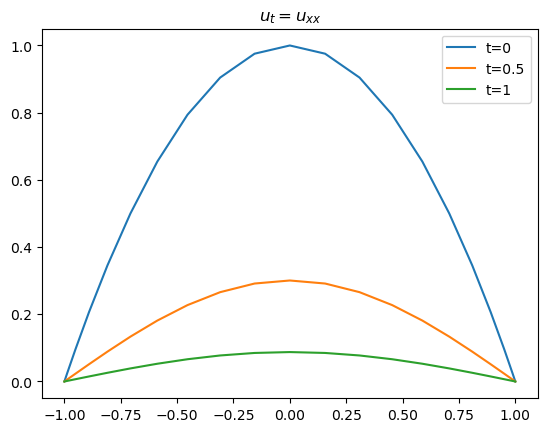

In [24]:
# Scipy calculation
t_span = [0, 1]
t_eval=[0,0.5,1]
sol = solve_ivp(RHS_1D_Diffusion_DiffMat, 
                t_span=t_span, 
                y0=u0[1:-1], 
                method='RK45', 
                t_eval=t_eval, 
                args=(D2, N, u_left, u_right))

fig = plt.figure()
ax = fig.add_subplot(111)

Nt = len(t_eval)
for it in range(Nt):
    u = np.concatenate(( np.array([u_left]), sol.y[:,it], np.array([u_right]) ))
    ax.plot(x, u, label='t={}'.format(t_eval[it]))


ax.legend()
ax.set_title(r'$u_t=u_{xx}$')

## Testing the differentiation matrix

The following comparison shows that the explicity formulas for the entries in the Chebyshev matrix, given by Trefethen, still hold if we reverse the order of the Chebyshev points. 

In [25]:
# Node range: 0,1,...,N
N = 2
# Chebyshev Gauss Lobatto nodes
x = ChebyshevGaussLobattoNodes_Reversed(N)
# Barycentric weights
w_bary = BarycentricWeights(x)
# Differentiation matrix by using formulas
D_cheb = ChebyshevDiffMatrix(x)
# Differentiation matrix from the general method
D_general = PolynomialDiffMatrix(x, w_bary)
print("Diff Mat Formula\n", D_cheb)
print("Diff Mat General\n", D_general)

Diff Mat Formula
 [[-1.50000000e+00  2.00000000e+00 -5.00000000e-01]
 [-5.00000000e-01  1.11022302e-16  5.00000000e-01]
 [ 5.00000000e-01 -2.00000000e+00  1.50000000e+00]]
Diff Mat General
 [[-1.50000000e+00  2.00000000e+00 -5.00000000e-01]
 [-5.00000000e-01  2.22044605e-16  5.00000000e-01]
 [ 5.00000000e-01 -2.00000000e+00  1.50000000e+00]]
